In [1]:
import requests
import datetime
import pandas as pd
from joblib import load, dump
from tqdm import tqdm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
import os

In [2]:
os.getcwd()

'/workspaces/mlops-things/monitoring'

In [4]:
files = [('green_tripdata_2022-02.parquet', './data'), ('green_tripdata_2022-01.parquet', './data')]

print("Download files:")
for file, path in files:
    url=f"https://d37ci6vzurychx.cloudfront.net/trip-data/{file}"
    resp=requests.get(url, stream=True)
    save_path=f"{path}/{file}"
    with open(save_path, "wb") as handle:
        for data in tqdm(resp.iter_content(),
                        desc=f"{file}",
                        postfix=f"save to {save_path}",
                        total=int(resp.headers["Content-Length"])):
            handle.write(data)

Download files:


green_tripdata_2022-01.parquet: 100%|██████████| 1254291/1254291 [00:07<00:00, 162825.43it/s, save to ./data/green_tripdata_2022-01.parquet]


In [3]:
jan_data = pd.read_parquet('data/green_tripdata_2022-01.parquet')
jan_data.head()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,0.50,0.5,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,0.50,0.5,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,3.25,0.5,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,0.50,0.5,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,0.50,0.5,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75


In [4]:
jan_data.describe()

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge
count,62495.000000,62495,62495,56200.000000,62495.000000,62495.000000,56200.000000,62495.000000,62495.000000,62495.00000,62495.000000,62495.000000,62495.000000,62495.000000,62495.000000,56200.000000,56200.000000,56200.000000
mean,1.849508,2022-01-16 14:18:36.026354,2022-01-16 14:37:37.189551,1.198719,97.615041,135.969902,1.258399,77.758632,13.914000,0.34756,0.426322,1.666540,0.208182,0.297312,17.490532,1.403594,1.040925,0.706628
min,1.000000,2009-01-01 00:34:01,2009-01-01 17:05:20,1.000000,1.000000,1.000000,0.000000,0.000000,-65.000000,-4.50000,-0.500000,-0.860000,-6.550000,-0.300000,-71.850000,1.000000,1.000000,0.000000
25%,2.000000,2022-01-08 23:41:50,2022-01-08 23:55:28.500000,1.000000,55.000000,74.000000,1.000000,1.080000,7.000000,0.00000,0.500000,0.000000,0.000000,0.300000,9.360000,1.000000,1.000000,0.000000
50%,2.000000,2022-01-16 15:59:42,2022-01-16 16:17:00,1.000000,75.000000,137.000000,1.000000,1.900000,10.500000,0.00000,0.500000,1.000000,0.000000,0.300000,13.860000,1.000000,1.000000,0.000000
75%,2.000000,2022-01-24 09:16:50,2022-01-24 09:37:28,1.000000,130.000000,215.000000,1.000000,3.500000,17.000000,0.50000,0.500000,2.610000,0.000000,0.300000,21.050000,2.000000,1.000000,2.750000
max,2.000000,2022-01-31 23:57:37,2022-02-01 21:01:54,5.000000,265.000000,265.000000,8.000000,224481.380000,604.500000,4.50000,0.500000,76.770000,44.750000,0.300000,605.300000,5.000000,2.000000,2.750000
std,0.357556,NaN,NaN,0.862313,62.987311,77.590956,0.877743,2909.354163,12.088819,0.65781,0.181381,2.484928,1.257659,0.037201,13.623416,0.516316,0.198119,1.201632


In [5]:
jan_data.shape

(62495, 20)

In [6]:
jan_data['duration_min'] = jan_data.lpep_dropoff_datetime - jan_data.lpep_pickup_datetime
jan_data.duration_min = jan_data.duration_min.apply(lambda td: float(td.total_seconds())/60)

In [9]:
jan_data = jan_data[(jan_data.duration_min >= 0) & (jan_data.duration_min <= 60)]
jan_data = jan_data[(jan_data.passenger_count >= 0) & (jan_data.passenger_count <= 8)]
jan_data.shape

(55425, 21)

<Axes: >

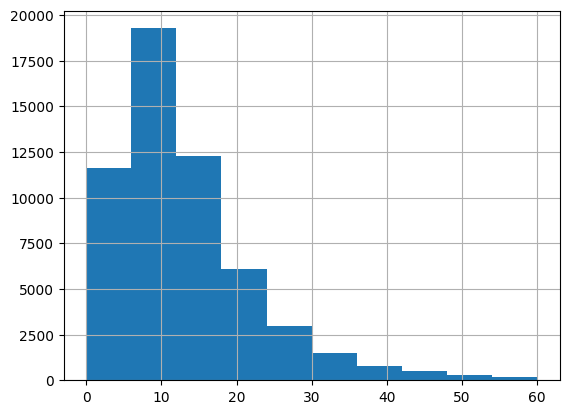

In [10]:
jan_data.duration_min.hist()

In [11]:
target = 'duration_min'
num_features = ["passenger_count", "trip_distance", "fare_amount", "total_amount"]
cat_features = ["PULocationID", "DOLocationID"]

In [13]:
train_data = jan_data[:30000]
val_data = jan_data[30000:]

In [14]:
model = LinearRegression()
model.fit(train_data[num_features + cat_features], train_data[target])

LinearRegression()

In [15]:
train_preds = model.predict(train_data[num_features + cat_features])
train_data['prediction'] = train_preds

/tmp/ipykernel_10556/3810346118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['prediction'] = train_preds


In [16]:
train_data

,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration_min,prediction
0,2,2022-01-01 00:14:21,2022-01-01 00:15:33,N,1.0,42,42,1.0,0.44,3.5,...,0.00,0.0,None,0.3,4.80,2.0,1.0,0.00,1.200000,6.693559
1,1,2022-01-01 00:20:55,2022-01-01 00:29:38,N,1.0,116,41,1.0,2.10,9.5,...,0.00,0.0,None,0.3,10.80,2.0,1.0,0.00,8.716667,9.965982
2,1,2022-01-01 00:57:02,2022-01-01 01:13:14,N,1.0,41,140,1.0,3.70,14.5,...,4.60,0.0,None,0.3,23.15,1.0,1.0,2.75,16.200000,15.121554
3,2,2022-01-01 00:07:42,2022-01-01 00:15:57,N,1.0,181,181,1.0,1.69,8.0,...,0.00,0.0,None,0.3,9.30,2.0,1.0,0.00,8.250000,9.020241
4,2,2022-01-01 00:07:50,2022-01-01 00:28:52,N,1.0,33,170,1.0,6.26,22.0,...,5.21,0.0,None,0.3,31.26,1.0,1.0,2.75,21.033333,19.929068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30380,2,2022-01-18 01:05:12,2022-01-18 01:17:16,N,1.0,95,197,1.0,1.64,10.0,...,2.00,0.0,None,0.3,13.30,1.0,1.0,0.00,12.066667,11.131151
30381,2,2022-01-18 01:46:29,2022-01-18 01:49:45,N,1.0,7,7,1.0,0.77,4.5,...,0.00,0.0,None,0.3,5.80,2.0,1.0,0.00,3.266667,7.409054
30383,2,2022-01-18 01:44:00,2022-01-18 01:51:29,N,5.0,116,167,1.0,2.12,15.0,...,3.00,0.0,None,0.3,18.30,1.0,2.0,0.00,7.483333,14.005990
30384,2,2022-01-18 02:44:42,2022-01-18 02:58:04,N,1.0,181,89,2.0,3.62,13.5,...,0.00,0.0,None,0.3,14.80,2.0,1.0,0.00,13.366667,12.167251


In [17]:
val_preds = model.predict(val_data[num_features + cat_features])
val_data['prediction'] = val_preds
val_data

/tmp/ipykernel_10556/772791921.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_data['prediction'] = val_preds


,VendorID,lpep_pickup_datetime,lpep_dropoff_datetime,store_and_fwd_flag,RatecodeID,PULocationID,DOLocationID,passenger_count,trip_distance,fare_amount,...,tip_amount,tolls_amount,ehail_fee,improvement_surcharge,total_amount,payment_type,trip_type,congestion_surcharge,duration_min,prediction
30386,2,2022-01-18 02:28:37,2022-01-18 02:32:18,N,1.0,95,95,1.0,0.58,4.5,...,1.74,0.0,None,0.3,7.54,1.0,1.0,0.0,3.683333,7.498191
30387,2,2022-01-18 02:00:54,2022-01-18 02:00:57,N,5.0,95,264,1.0,0.00,6.7,...,6.00,0.0,None,0.3,13.00,1.0,2.0,0.0,0.050000,9.876110
30388,2,2022-01-18 03:10:47,2022-01-18 03:18:24,N,1.0,92,138,1.0,3.01,10.5,...,2.36,0.0,None,0.3,14.16,1.0,1.0,0.0,7.616667,11.395178
30389,2,2022-01-18 03:04:31,2022-01-18 03:07:45,N,1.0,75,238,1.0,1.40,6.0,...,1.10,0.0,None,0.3,8.40,1.0,1.0,0.0,3.233333,8.702197
30390,2,2022-01-18 02:59:40,2022-01-18 03:06:17,N,1.0,244,243,1.0,1.34,7.0,...,0.00,0.0,None,0.3,8.30,2.0,1.0,0.0,6.616667,8.218209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56195,2,2022-01-31 23:33:59,2022-01-31 23:47:07,N,1.0,74,42,1.0,2.09,10.5,...,0.00,0.0,None,0.3,11.80,2.0,1.0,0.0,13.133333,10.797252
56196,2,2022-01-31 23:53:33,2022-02-01 00:10:04,N,1.0,92,157,1.0,6.26,19.5,...,0.00,0.0,None,0.3,20.80,1.0,1.0,0.0,16.516667,16.447309
56197,2,2022-01-31 23:35:02,2022-01-31 23:40:52,N,1.0,95,95,1.0,0.91,6.0,...,1.46,0.0,None,0.3,8.76,1.0,1.0,0.0,5.833333,8.356311
56198,2,2022-01-31 23:39:20,2022-01-31 23:52:25,N,5.0,119,20,1.0,3.66,12.0,...,0.00,0.0,None,0.3,12.30,2.0,2.0,0.0,13.083333,11.225724


In [18]:
print(mean_absolute_error(train_data.duration_min, train_data.prediction))
print(mean_absolute_error(val_data.duration_min, val_data.prediction))

3.809698822352763
4.147400633918845


In [22]:
os.getcwd()

'/workspaces/mlops-things/monitoring'

In [24]:
with open(f'{os.getcwd()}/models/lin_reg.bin', "wb") as f:
    dump(model, f)

In [26]:
val_data.to_parquet(f'{os.getcwd()}/data/reference.parquet')